In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Importing csv file 
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')

df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


Some values in "Passasjer_Ombord" is negative. It is informed in the assignment that this might be due to sensors not working properly, so we choose to change these values to zero.

In [4]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])

In [5]:
df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,06:20:24,06:20:29,06:20:00,06:20:00,112,0
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4


Features that have chosen to add are:
1. How much it is delayed ("Forsinkelsestid"), shows details about the total delayed time
2. Delays ("Forsinket"), boolean value
3. 
4.
5.

# 1. How much it is delayed ("Forsinkelsestid")

In [6]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')

The values in the columns that show departure and arrival time have been converted to datetime, so that we can subtract to find the specific total delay time.

In [7]:
df.head(10)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,2021-09-26 17:22:56,2021-09-26 17:23:23,2021-09-26 17:16:00,2021-09-26 17:16:00,151,8
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,2021-09-26 13:19:00,2021-09-26 13:19:05,2021-09-26 13:17:00,2021-09-26 13:17:00,112,1
7,15003-2020-07-27T06:18:00+02:00,27/07/2020,Oslo,Indre By,St.Hanshaugen,Hammersborggata (ved Storgata retning vest),St. Olavs plass (mot Frederiks gate),Lokal,Viken,150,1,2021-09-26 06:20:24,2021-09-26 06:20:29,2021-09-26 06:20:00,2021-09-26 06:20:00,112,0
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,2021-09-26 15:10:12,2021-09-26 15:10:34,2021-09-26 15:09:00,2021-09-26 15:09:00,112,2
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,2021-09-26 18:37:41,2021-09-26 18:38:19,2021-09-26 18:29:00,2021-09-26 18:29:00,112,4


Four columns have been changed, the names are the same as before.
A new column is being added, we call it "Forsinkelsestid". 

In [8]:
df['Forsinkelsestid'] = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

In [9]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelsestid
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5,0 days 00:00:59
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5,0 days 00:00:26
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6,0 days 00:00:21
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10,0 days 00:01:26
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10,0 days 00:01:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,2021-09-26 16:23:18,2021-09-26 16:23:48,2021-09-26 16:10:00,2021-09-26 16:10:00,151,2,0 days 00:13:48
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,2021-09-26 06:00:32,2021-09-26 06:00:40,2021-09-26 05:59:00,2021-09-26 05:59:00,151,2,0 days 00:01:40
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,2021-09-26 17:42:43,2021-09-26 17:43:10,2021-09-26 17:32:00,2021-09-26 17:32:00,106,3,0 days 00:11:10
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,2021-09-26 06:00:11,2021-09-26 06:00:23,2021-09-26 05:59:00,2021-09-26 05:59:00,151,5,0 days 00:01:23


We have added a column called "Er_Forsinket", which is a boolean value that tells us if a bus actually is delayed. An extra gap of one minute have been added, so that it is not considered to be delayed if it has arrived within one minute of the planned arrival time.

In [10]:
df['Er_Forsinket'] = df['Forsinkelsestid'] > "0 days 00:01:00" 

In [11]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelsestid,Er_Forsinket
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5,0 days 00:00:59,False
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5,0 days 00:00:26,False
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6,0 days 00:00:21,False
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10,0 days 00:01:26,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10,0 days 00:01:53,True


In [12]:

# Ukedag

# psst import datetime!

# AttributeError: Can only use .dt accessor with datetimelike values
# We have to convert date to datetime:

df['Dato'] = pd.to_datetime(df['Dato'])

df['Ukedag'] = df['Dato'].dt.day_name()

# Making it norwegian because the entire table is in norwegian so why not?
conditions = [
    (df['Ukedag'] == "Monday"),
    (df['Ukedag'] == "Tuesday"),
    (df['Ukedag'] == "Wednesday"),
    (df['Ukedag'] == "Thursday"),
    (df['Ukedag'] == "Friday"),
    (df['Ukedag'] == "Saturday"),
    (df['Ukedag'] == "Sunday"),
    ]

ukedagArray = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag']

df['Ukedag'] = np.select(conditions, ukedagArray)
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelsestid,Er_Forsinket,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5,0 days 00:00:59,False,Torsdag
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5,0 days 00:00:26,False,Lørdag
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6,0 days 00:00:21,False,Søndag
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10,0 days 00:01:26,True,Mandag
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10,0 days 00:01:53,True,Torsdag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,2021-09-26 16:23:18,2021-09-26 16:23:48,2021-09-26 16:10:00,2021-09-26 16:10:00,151,2,0 days 00:13:48,True,Tirsdag
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,2021-09-26 06:00:32,2021-09-26 06:00:40,2021-09-26 05:59:00,2021-09-26 05:59:00,151,2,0 days 00:01:40,True,Tirsdag
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,2021-09-26 17:42:43,2021-09-26 17:43:10,2021-09-26 17:32:00,2021-09-26 17:32:00,106,3,0 days 00:11:10,True,Fredag
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,2021-09-26 06:00:11,2021-09-26 06:00:23,2021-09-26 05:59:00,2021-09-26 05:59:00,151,5,0 days 00:01:23,True,Torsdag


In [13]:
mandag=  df[df['Ukedag'].str.contains("Mandag")].Passasjerer_Ombord.sum()
tirsdag= df[df['Ukedag'].str.contains("Tirsdag")].Passasjerer_Ombord.sum()
onsdag= df[df['Ukedag'].str.contains("Onsdag")].Passasjerer_Ombord.sum()
torsdag= df[df['Ukedag'].str.contains("Torsdag")].Passasjerer_Ombord.sum()
fredag= df[df['Ukedag'].str.contains("Fredag")].Passasjerer_Ombord.sum()
lørdag= df[df['Ukedag'].str.contains("Lørdag")].Passasjerer_Ombord.sum()
søndag = df[df['Ukedag'].str.contains("Søndag")].Passasjerer_Ombord.sum()
Antall_PassasjererIUke = {'Ukedag': ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag", 'Lørdag','Søndag'],
        'Passasjerer_Per_Ukedag': [mandag, tirsdag, onsdag, torsdag, fredag, lørdag, søndag]
       }

Antall_PassasjererIUkedf = pd.DataFrame(Antall_PassasjererIUke , columns = ['Ukedag', 'Passasjerer_Per_Ukedag'])
Antall_PassasjererIUkedf




,Ukedag,Passasjerer_Per_Ukedag
0,Mandag,4692
1,Tirsdag,4744
2,Onsdag,4228
3,Torsdag,4499
4,Fredag,5110
5,Lørdag,3468
6,Søndag,3130


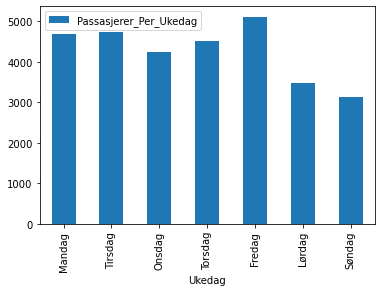

In [14]:
Antall_PassasjererIUkedf = pd.DataFrame(Antall_PassasjererIUkedf,columns=['Ukedag','Passasjerer_Per_Ukedag'])
Antall_PassasjererIUkedf.plot(x ='Ukedag', y='Passasjerer_Per_Ukedag', kind = 'bar')
plt.show()

In [15]:
# AttributeError: Can only use .dt accessor with datetimelike values
# We have to convert date to datetime:

df['Dato'] = pd.to_datetime(df['Dato'])
df['Måned'] = df['Dato'].dt.month_name()


conditions = [
    (df['Måned'] == "January"),
    (df['Måned'] == "February"),
    (df['Måned'] == "March"),
    (df['Måned'] == "April"),
    (df['Måned'] == "May"),
    (df['Måned'] == "June"),
    (df['Måned'] == "July"),
    (df['Måned'] == "August"),
    (df['Måned'] == "September"),
    (df['Måned'] == "October"),
    (df['Måned'] == "November"),
    (df['Måned'] == "December")
    ]

månedArray = ['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni', 'Juli','August', 'September', 'Oktober','November', 'December']

df['Måned'] = np.select(conditions, månedArray).astype(str)

df



,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelsestid,Er_Forsinket,Ukedag,Måned
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5,0 days 00:00:59,False,Torsdag,Oktober
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5,0 days 00:00:26,False,Lørdag,August
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6,0 days 00:00:21,False,Søndag,Mars
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10,0 days 00:01:26,True,Mandag,Juli
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10,0 days 00:01:53,True,Torsdag,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,2021-09-26 16:23:18,2021-09-26 16:23:48,2021-09-26 16:10:00,2021-09-26 16:10:00,151,2,0 days 00:13:48,True,Tirsdag,Oktober
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,2021-09-26 06:00:32,2021-09-26 06:00:40,2021-09-26 05:59:00,2021-09-26 05:59:00,151,2,0 days 00:01:40,True,Tirsdag,Juni
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,2021-09-26 17:42:43,2021-09-26 17:43:10,2021-09-26 17:32:00,2021-09-26 17:32:00,106,3,0 days 00:11:10,True,Fredag,November
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,2021-09-26 06:00:11,2021-09-26 06:00:23,2021-09-26 05:59:00,2021-09-26 05:59:00,151,5,0 days 00:01:23,True,Torsdag,August


In [16]:
januar=  df[df['Måned'].str.contains("Januar")].Passasjerer_Ombord.sum()
februar= df[df['Måned'].str.contains("Februar")].Passasjerer_Ombord.sum()
mars= df[df['Måned'].str.contains("Mars")].Passasjerer_Ombord.sum()
april= df[df['Måned'].str.contains("April")].Passasjerer_Ombord.sum()
mai= df[df['Måned'].str.contains("Mai")].Passasjerer_Ombord.sum()
juni= df[df['Måned'].str.contains("Juni")].Passasjerer_Ombord.sum()
juli= df[df['Måned'].str.contains("Juli")].Passasjerer_Ombord.sum()
august=  df[df['Måned'].str.contains("August")].Passasjerer_Ombord.sum()
september= df[df['Måned'].str.contains("September")].Passasjerer_Ombord.sum()
oktober= df[df['Måned'].str.contains("Oktober")].Passasjerer_Ombord.sum()
november = df[df['Måned'].str.contains("November")].Passasjerer_Ombord.sum()
desember=  df[df['Måned'].str.contains("December")].Passasjerer_Ombord.sum()

Antall_Passasjerer = {'Måned': ["Januar", "Februar", "Mars", "April", "Mai", 'Juni','Juli','August',"September", "Oktober" , "November","December"],
        'Passasjerer_Per_Måned': [januar,februar, mars, april, mai, juni, juli, august, september, oktober,november, desember]
       }

#Antall_Passasjerer = { 'Passasjerer_Per_Måned': [januar,februar, mars, april, mai, juni, juli, august, september, oktober,november, desember]
 #       }

# Convert the dictionary into DataFrame
#Passasjerer_Per_Måned = pd.DataFrame(Antall_Passasjerer, columns = ['Måned', 'Passasjerer_Per_Måned'])

#df['Passasjerer_Per_Måned '] = Passasjerer_Per_Måned
#df

Passasjerer_Per_Måneddf = pd.DataFrame(Antall_Passasjerer , columns = ['Måned', 'Passasjerer_Per_Måned'])
Passasjerer_Per_Måneddf




,Måned,Passasjerer_Per_Måned
0,Januar,792
1,Februar,821
2,Mars,1082
3,April,813
4,Mai,911
5,Juni,5738
6,Juli,7007
7,August,8803
8,September,901
9,Oktober,979


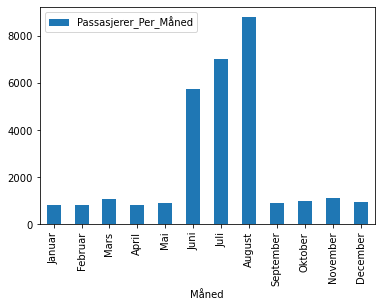

In [17]:
Passasjerer_Per_Måned = pd.DataFrame(Antall_Passasjerer,columns=['Måned','Passasjerer_Per_Måned'])
Passasjerer_Per_Måned.plot(x ='Måned', y='Passasjerer_Per_Måned', kind = 'bar')
plt.show()